# Demo charla UDD

## Ollama

Descargando el modelo que se va a utilizar y creando REST API
``` zsh
ollama pull llama3.2
ollama serve
```

**SIN ENOLA**

In [34]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama import ChatOllama

template = """Pregunta: {question}
Respuesta: Pensemos paso a paso."""
question = "Cuáles son las 2 ingenerías más conocidas?"
model_name = "llama3.2"
temperature = 0

prompt = ChatPromptTemplate.from_template(template)

model = ChatOllama(
    model=model_name,
    temperature=temperature)

chain = prompt | model

response = chain.invoke({"question": question})

print(response.content)
print(response.usage_metadata)

2024-12-04 09:28:52,704 HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


¡Claro! Vamos a analizar el tema de las ingenierías y a identificar las dos más conocidas.

**Ingeniería**

La ingeniería es una disciplina científica que se enfoca en el diseño, desarrollo y implementación de soluciones tecnológicas para resolver problemas y mejorar procesos. Es una de las carreras más ampliamente reconocidas y respetadas en todo el mundo.

**Las 2 ingenierías más conocidas**

Después de investigar y analizar diferentes opciones, podemos identificar las dos ingenierías más conocidas como:

1. **Ingeniería Civil**: La ingeniería civil es una de las disciplinas más antiguas y ampliamente practicadas. Se enfoca en el diseño, construcción y mantenimiento de infraestructuras, como carreteras, puentes, edificios, sistemas de agua y alcantarillado.
2. **Ingeniería Mecánica**: La ingeniería mecánica es otra disciplina muy conocida que se enfoca en el diseño, desarrollo y fabricación de máquinas y sistemas mecánicos. Incluye áreas como la ingeniería de motores, sistemas de tra

**CON ENOLA**

In [41]:
import os, uuid
from dotenv import load_dotenv
from enola.tracking import Tracking
load_dotenv()

# Se obtiene token de ENOLA
token = os.getenv("ENOLA_TOKEN_CHATBOT")

# Inicialización de tracking
tracking = Tracking(
    token=token,
    name="Demo UDD",
    is_test=True,
    app_id="DemoUDD",
    session_id=str(uuid.uuid4()),
    channel_id="code",
    message_input=question
)

# Se crea un nuevo paso
step = tracking.new_step("Pregunta/Respuesta", question)

# Se añaden información al paso
step.add_extra_info("Propmt", template.format(question=question))
step.add_extra_info("Nombre Modelo", model_name)
step.add_extra_info("Temperatura", temperature)

prompt = ChatPromptTemplate.from_template(template)

model = ChatOllama(
    model=model_name,
    temperature=temperature)

chain = prompt | model

response = chain.invoke({"question": question})
message_output = response.content
usage = response.usage_metadata

# Se cierra el paso
tracking.close_step_token(
    step=step,
    successfull=True,
    message_output=message_output,
    token_input_num=usage['input_tokens'],
    token_output_num=usage['output_tokens'],
    token_total_num=usage['total_tokens'],
)

# Se termina la evaluación
tracking.execute(
    successfull=True,
    message_output=message_output
)

print("\n-----------")
print('MODEL RESPONSE:')
print(message_output)

2024-12-04 09:56:57,925 WELCOME to Enola...
2024-12-04 09:56:57,925 authorized...
2024-12-04 09:56:57,926 STARTED!!!
2024-12-04 09:57:00,108 HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Demo UDD: sending to server... 
Demo UDD: finish OK! 

-----------
MODEL RESPONSE:
¡Claro! Vamos a analizar el tema de las ingenierías y a identificar las dos más conocidas.

**Ingeniería**

La ingeniería es una disciplina científica que se enfoca en el diseño, desarrollo y implementación de soluciones tecnológicas para resolver problemas y mejorar procesos. Es una de las carreras más ampliamente reconocidas y respetadas en todo el mundo.

**Las 2 ingenierías más conocidas**

Después de investigar y analizar diferentes opciones, podemos identificar las dos ingenierías más conocidas como:

1. **Ingeniería Civil**: La ingeniería civil es una de las disciplinas más antiguas y ampliamente practicadas. Se enfoca en el diseño, construcción y mantenimiento de infraestructuras, como carreteras, puentes, edificios, sistemas de agua y alcantarillado.
2. **Ingeniería Mecánica**: La ingeniería mecánica es otra disciplina muy conocida que se enfoca en el diseño, desarrollo y fabricación de máquinas

#### Evaluación

In [43]:
from enola import evaluation
from enola.enola_types import EvalType

eval = evaluation.Evaluation(
    token=token,
    eval_type=EvalType.USER,
    user_id="udd_demo@huemulsolutions.com",
    user_name="udd_demo",
)


2024-12-04 09:57:39,558 WELCOME to Enola...
2024-12-04 09:57:39,558 authorized...
2024-12-04 09:57:39,558 STARTED!!!


In [44]:

eval.add_evaluation_by_level(
    enola_id=tracking.enola_id, # Se obtiene el enola_id de la evaluación
    eval_id="evaluacion general 0 ",
    level=1,
    comment="Respuesta con mucho texto"
)

result = eval.execute()


2024-12-04 09:57:41,984 creating Enola Evaluation


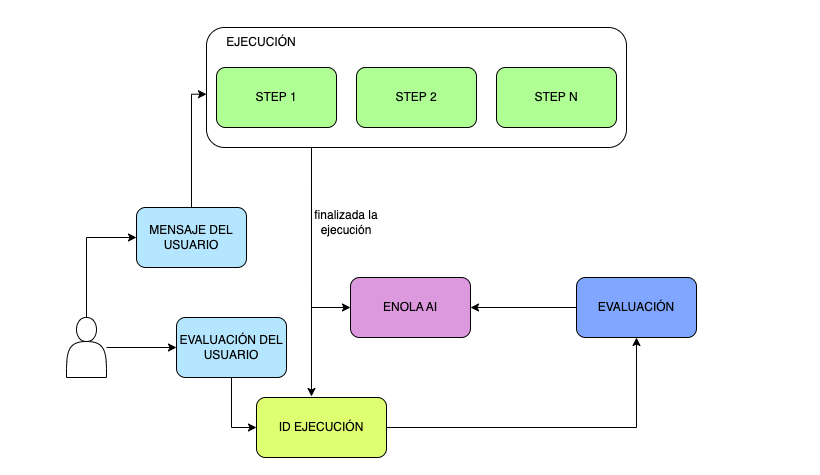

In [29]:
from IPython.display import Image, display

image_path = 'img/SCR-20241203-ovse.png'
display(Image(filename=image_path, width=800))  # Ajusta el valor de width según sea necesario

## Agente: Gestión email

### Inicializar LLM

In [ ]:
from langchain_openai import AzureChatOpenAI
from langchain_core.messages import SystemMessage, AIMessage, HumanMessage
from langchain_core.tools import tool
import datetime
from dotenv import load_dotenv

import os
load_dotenv()

llm = AzureChatOpenAI(azure_deployment=os.getenv("GPT4O_DEPLOY"))
# llm = ChatOllama(
#     model=model_name,
#     temperature=temperature)


In [3]:
import json

def get_dummy_data():
    with open('inbox.json', 'r') as file:
        data = json.load(file)
    return data

def modify_dummy_data(data):
    with open('inbox.json', 'w') as file:
        json.dump(data, file)

### Generar herramientas

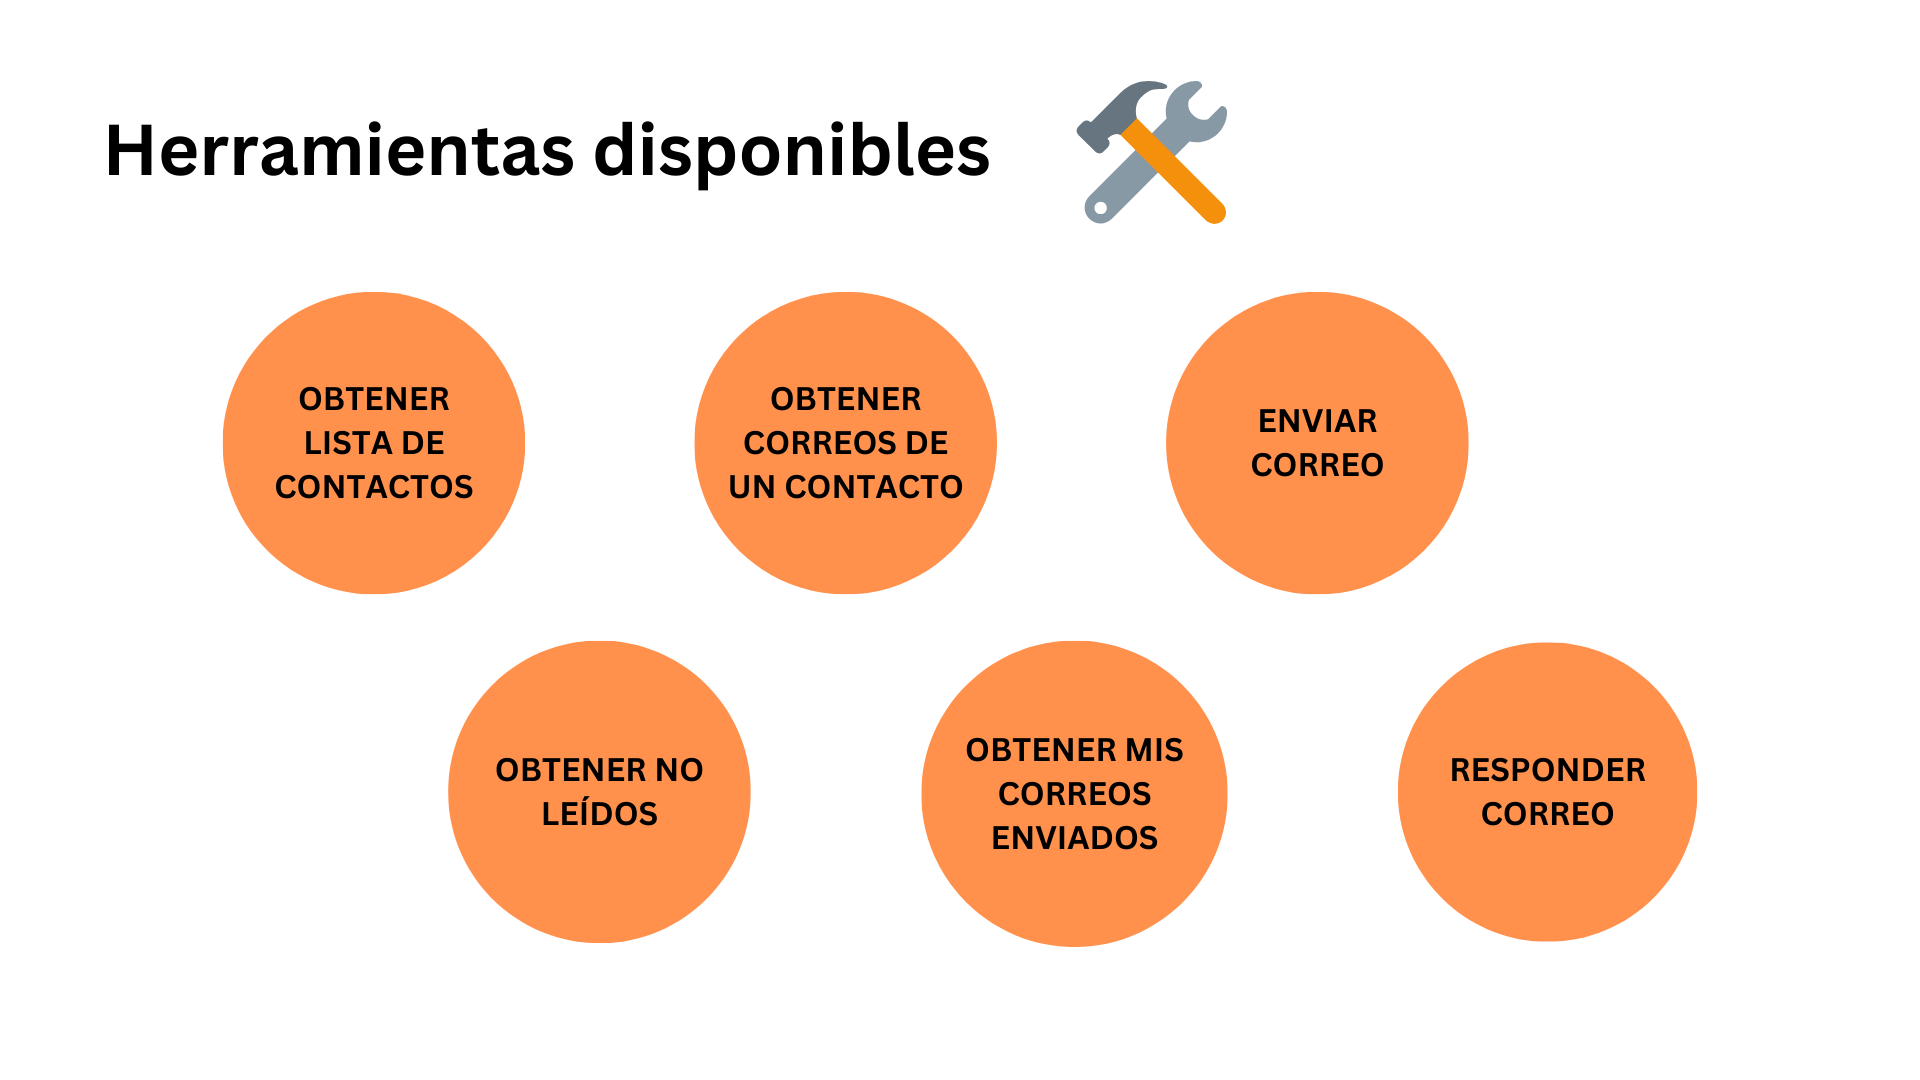

In [28]:
from IPython.display import Image, display

image_path = 'img/Herramientas disponibles.png'
display(Image(filename=image_path, width=800))  # Ajusta el valor de width según sea necesario

In [ ]:
@tool
def get_unread():
    """
    Tool to get the unread mails from the user inbox.
    """
    mails = get_dummy_data()['inbox']
    filtered = list(filter(lambda x: x['read'] == False, mails))
    return filtered

@tool
def get_contact_list():
    """
    Tool to get the contact list from the user inbox containing the name and email address.
    """
    return get_dummy_data()["contacts"]


@tool
def get_emails_from_contact(email_address: str):
    """
    Tool to get the emails from a specific contact. The email_address should be a string.
    In case you don't have the email address, you can use the get_contact_list tool to get the list of contacts.
    """
    mails = get_dummy_data()['inbox']
    filtered = list(filter(lambda x: x['sender']['email'] == email_address, mails))
    return filtered


@tool
def get_sended_emails(email_address: str = None):
    """
    Tool to get the sended emails from the user inbox.
    If email_address is provided, the tool will return the sended emails to that specific email address.
    """
    mails = get_dummy_data()['inbox']
    if email_address:
        filtered = list(filter(lambda x: x['sender']['is_user'] == True and x['to'] == email_address, mails))
        return
    filtered = list(filter(lambda x: x['sender']['is_user'] == True, mails))
    return filtered


@tool
def send_email(email_address: str, subject:str, message: str):
    """
    Tool to send an email to a specific email address
    """
    data = get_dummy_data()
    inbox = data['inbox']
    new_id = max([x['id'] for x in inbox]) + 1
    new_mail = {
        "id": new_id,
        "subject": subject,
        "date": datetime.datetime.now().strftime("%Y-%m-%dT%H:%M:%S"),
        "read": True,
        "sender": {
          "email": "matias.barrera@huemulsolutions.com",
          "is_user": True
        },
        "to": email_address,
        "content": message,
        "attachments": [],
        "replies": []
      }
    inbox.append(new_mail)
    inbox = sorted(inbox, key=lambda x: x['date'], reverse=True)
    data['inbox'] = inbox
    modify_dummy_data(data)
    return f"Email sent to {email_address}"

tools = [get_unread, get_contact_list, get_emails_from_contact, get_sended_emails, send_email]

### Generar Grafo

In [ ]:
from langgraph.graph import StateGraph, END
from langchain_core.prompts import ChatPromptTemplate
from typing import Annotated, Optional
from typing_extensions import TypedDict, List, Callable
from langgraph.graph.message import AnyMessage, add_messages
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    internal_messages: Annotated[list[AnyMessage], add_messages]
    tool_call: Optional[AIMessage] = None
    
    
# NODO AGENTE
def agent_node(state: State, config: dict)-> State:
    current_datetime = datetime.datetime(2024, 11, 8).strftime("%A, %d of %B, %Y")
    prompt = f"""
Eres un asistente que ayuda con la gestión de la bandeja de entrada del usuario Matias Barrera (matias.barrera@huemulsolutions.com)
La fecha de hoy es {current_datetime}
La conversación es la siguiente:
"""
    chat_prompt = ChatPromptTemplate.from_messages(
        [
            SystemMessage(content=prompt),
            MessagesPlaceholder("messages")
        ]
    )
    llm_w_tools = llm.bind_tools(config['configurable']['tools'])
    chain = chat_prompt | llm_w_tools
    response = chain.invoke({"messages": state['internal_messages']})
    tool_calls = response.additional_kwargs.get('tool_calls')
    if tool_calls:
        state['tool_call'] = tool_calls
    else:
        ai_message = AIMessage(content=response.content)
        state['messages'] = ai_message
        state['internal_messages'] = ai_message
    return state

# NODO DECISIÓN
def should_continue(state: State)-> str:
    if state.get('tool_call'):
        return 'tool'
    return 'message'
    
# NODO HERRAMIENTA
def tool_execution(state: State, config: dict)-> State:
    tool_calls = state['tool_call']
    print(tool_calls)
    function_name = tool_calls[0]['function']['name']
    args = json.loads(tool_calls[0]['function']['arguments'])
    
    tool = next((x for x in config['configurable']['tools'] if x.name == function_name), None)
    if tool:
        try:
            tool_output = tool.func(**args)
        except Exception as e:
            tool_output = f"Error al ejecutar la herramienta"
        tool_message = SystemMessage(content=f"Se ejecutó la herramienta {function_name} con los argumentos {args} y se obtuvo el siguiente resultado: {tool_output}")
        state['internal_messages'] = tool_message
    else:
        state['internal_messages'] = SystemMessage(content=f"No se encontró la herramienta {function_name}")
    state['tool_call'] = None
    return state


graph = StateGraph(State)


graph.add_node('agent', agent_node)
graph.add_node('tool', tool_execution)

graph.set_entry_point('agent')
graph.add_edge('tool', 'agent')
graph.add_conditional_edges(
    'agent', should_continue, 
    {
        'tool': 'tool',
        'message': END
    }
)

compiled_graph = graph.compile()


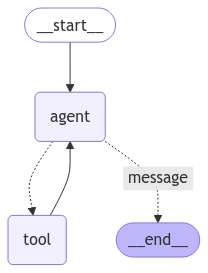

In [10]:
from IPython.display import Image, display

try:
    display(Image(compiled_graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [48]:
from rich import print
llm = AzureChatOpenAI(azure_deployment=os.getenv("GPT4O_DEPLOY"))

prompt = f"""
Eres un asistente que ayuda con la gestión de la bandeja de entrada del usuario Matias Barrera (matias.barrera@huemulsolutions.com)
La conversación es la siguiente:
"""
chat_prompt = ChatPromptTemplate.from_messages(
    [
        SystemMessage(content=prompt),
        MessagesPlaceholder("messages")
    ]
)

messages = [
    AIMessage(content='Hola, ¿en qué puedo ayudarte?'),
    HumanMessage(content='¿Cuántos correos tengo sin leer?'),
]

llm_w_tools = llm.bind_tools(tools)
chain = chat_prompt | llm_w_tools
response = chain.invoke({"messages": messages})

print(response)

2024-12-04 11:08:08,613 HTTP Request: POST https://openai-hs-techlabs-dev-001.openai.azure.com//openai/deployments/demo-agents-gpt4o/chat/completions?api-version=2023-12-01-preview "HTTP/1.1 200 OK"


AIMessage(
    content='',
    additional_kwargs={
        'tool_calls': [
            {
                'id': 'call_GlGL9ioe71wZP9SsgD4L3G0B',
                'function': {'arguments': '{}', 'name': 'get_unread'},
                'type': 'function'
            }
        ],
        'refusal': None
    },
    response_metadata={
        'token_usage': {
            'completion_tokens': 11,
            'prompt_tokens': 257,
            'total_tokens': 268,
            'completion_tokens_details': None,
            'prompt_tokens_details': None
        },
        'model_name': 'gpt-4o-2024-05-13',
        'system_fingerprint': 'fp_fa1dad0729',
        'prompt_filter_results': [
            {
                'prompt_index': 0,
                'content_filter_results': {
                    'hate': {'filtered': False, 'severity': 'safe'},
                    'jailbreak': {'filtered': False, 'detected': False},
                    'self_harm': {'filtered': False, 'severity': 'safe'},
                    'sexual': {'filtered': False, 'severity': 'safe'},
                    'violence': {'filtered': False, 'severity': 'safe'}
                }
            }
        ],
        'finish_reason': 'tool_calls',
        'logprobs': None,
        'content_filter_results': {}
    },
    id='run-3f669113-f7d8-401e-abb1-cbb3cf1c314f-0',
    tool_calls=[{'name': 'get_unread', 'args': {}, 'id': 'call_GlGL9ioe71wZP9SsgD4L3G0B', 'type': 'tool_call'}],
    usage_metadata={
        'input_tokens': 257,
        'output_tokens': 11,
        'total_tokens': 268,
        'input_token_details': {},
        'output_token_details': {}
    }
)